### Data understanding
All data quality issues are correctly identified and reported.
1. Due to Mixed Dtypes in column 'next_pymnt_d', low_memory has been set to False.


Wherever required, the meanings of the variables are correctly interpreted and written either in the comments or text.

| Syntax      | Description | Test Text     |
| :---        |    :----:   |          ---: |
| Header      | Title       | Here's this   |
| Paragraph   | Text        | And more      |



In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py 
# py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features
import plotly.io as pio

loan_data = pd.read_csv("loan.csv", low_memory=False,  header = 0)

### Data Cleaning and Manipulation (20%)


Data quality issues are addressed in the right way (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 

 

If applicable, data is converted to a suitable and convenient format to work with using the right methods.


Manipulation of strings and dates is done correctly wherever required.

#####  There is no Incorrect rows - 	Header rows, footer rows
#####  There is no Summary rows	Total, subtotal rows
#####  There is no Extra rows	Column numbers, indicators, blank rows
#####  Missing Column Names	Column names as blanks, NA, XX etc.
#####  There is no Inconsistent column names	X1, X2,C4 which give no information about the column

#####  No Unique Identifier	E.g.  Multiple cities with same name in a column
#####  Misaligned columns	Shifted columns




#####  Cleaned up Unnecessary columns Keep only columns where 80% or more valid data is available

In [84]:
df_cleaned_columns = loan_data.dropna(how='any',axis=1,thresh=loan_data.shape[0]*0.8)


#####  Cleaned up Unnecessary rows - Keep only rows where 70% or more valid data is available

In [85]:
df_cleaned_rows = df_cleaned_columns.dropna(how='any',axis=0,thresh=df_cleaned_columns.shape[1]*0.7 )



#####  There is no Columns containing Multiple data values	E.g. address columns containing city, state, country

######  There is no duplicate content in data frame

In [86]:
df_cleaned_rows[df_cleaned_rows.duplicated()]


Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 53 columns]

# Customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.



delinq_2yrs
earliest_cr_line
inq_last_6mths
open_acc
pub_rec
revol_bal
revol_util
total_acc
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
application_type
 


In [87]:
df_cleaned_rows.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths',
                      'open_acc','pub_rec','revol_bal','revol_util',
                      'total_acc','out_prncp','out_prncp_inv','total_pymnt',
                      'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                      'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                      'last_credit_pull_d','application_type'], axis=1,inplace = True)


# Below columns are dropped for multiple reasons

###### Few are credit bureau informations as account now deliquent, chargedoff in 12 months etc
###### Few are single valued informative policy code, payment plan

In [88]:
df_cleaned_rows.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths',
                      'acc_now_delinq','policy_code','collections_12_mths_ex_med','initial_list_status',
                      'title','url','pymnt_plan'], axis=1,inplace = True)

In [89]:
# Rename Employee length to Employee Experience
# Rename issue date to Loan Date
# Rename dti to debt_to_income
df_cleaned_rows.rename(columns = {'emp_length':'emp_exp',
                                  'issue_d':'loan_date',
                                  'dti':'debt_to_income'
                                 }, inplace = True)

In [51]:
df_cleaned_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term                  39717 non-null  object 
 6   int_rate              39717 non-null  object 
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  emp_title             37258 non-null  object 
 11  emp_exp               38642 non-null  object 
 12  home_ownership        39717 non-null  object 
 13  annual_inc            39717 non-null  float64
 14  verification_status   39717 non-null  object 
 15  loan_date          

####  Below Column are the Date columns but dtypes are object types. Convert these columns into Date format Dtype
# Convert Loan date in to new columns called Loan month and Loan year
| Column      | Dtype| 
| :---        |    :----:   |  
| loan_date | object       | 


In [90]:
df_cleaned_rows['loan_date'] = pd.to_datetime(df_cleaned_rows['loan_date'],format='%b-%y')
df_cleaned_rows['loan_month'] = df_cleaned_rows['loan_date'].dt.month_name()
df_cleaned_rows['loan_year'] = df_cleaned_rows['loan_date'].dt.year
df_cleaned_rows['loan_month']

0        December
1        December
2        December
3        December
4        December
           ...   
39712        July
39713        July
39714        July
39715        July
39716        June
Name: loan_month, Length: 39717, dtype: object

##### Zipcode is converted into integer format

In [91]:
df_cleaned_rows['zip_code'] = df_cleaned_rows['zip_code'].map(lambda x: int(x.replace('xx','')))


#####  Convert Interest rate column to float after removing %

In [92]:
df_cleaned_rows['int_rate'] = df_cleaned_rows['int_rate'].map(lambda x: float(x.replace('%','')))


#####  Convert Investor funded amount to 2 decimals %

In [93]:
df_cleaned_rows['funded_amnt_inv'] = df_cleaned_rows['funded_amnt_inv'].round(2)


In [94]:
df_cleaned_rows['emp_exp'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_exp, dtype: int64

#####  Convert Emp length to integer possible values 
##### Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
#####  nan is not valid value hence filled with value 0
#### Rename Emp length to Employe Experience

In [95]:
def remove_years(x):
    x=str(x)
    if x == '10+ years':
        x = 10
    elif x == '< 1 year':
        x = 0
    elif x == '1 year':
        x = 1
    elif x == 'nan':
        x = 0
    else:
        x = x[0]
    return x

df_cleaned_rows['emp_exp'] = df_cleaned_rows['emp_exp'].apply(remove_years)
df_cleaned_rows['emp_exp'] = df_cleaned_rows['emp_exp'].astype('int64')


#### Filter records such that Funded Amount and Funded Amount Investor doesn't exceed loan amount

In [96]:
# Funded Amount <= Loan Amount
# Funded Amount Investor >= Funded Amount OR Funded Amount Investor <= Funded Amount
# Funded Amount Investor <= Loan Amount

# LA     FA  FINVA
# 1000  800  700
# 1000  800  900

df_cleaned_rows[(df_cleaned_rows['loan_amnt']>=df_cleaned_rows['funded_amnt']) &
                (df_cleaned_rows['loan_amnt']>=df_cleaned_rows['funded_amnt_inv'])
               ].shape


(39717, 24)

In [69]:
df_cleaned_rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    39717 non-null  int64         
 1   member_id             39717 non-null  int64         
 2   loan_amnt             39717 non-null  int64         
 3   funded_amnt           39717 non-null  int64         
 4   funded_amnt_inv       39717 non-null  float64       
 5   term                  39717 non-null  int64         
 6   int_rate              39717 non-null  float64       
 7   installment           39717 non-null  float64       
 8   grade                 39717 non-null  object        
 9   sub_grade             39717 non-null  object        
 10  emp_title             37258 non-null  object        
 11  emp_exp               39717 non-null  int64         
 12  home_ownership        39717 non-null  object        
 13  annual_inc      

In [97]:
# From Dataframe info we observe that pub_rec_bankruptcies has only 39020 entries.
# Rest of the entries can be filled with Mode of the value in the column  assuming there are no bankrupcies
df_cleaned_rows.pub_rec_bankruptcies.fillna(df_cleaned_rows.pub_rec_bankruptcies.mode()[0], inplace=True)

In [98]:
# Since the Loan status  marked 'current' are neither fully paid not defaulted, lets get rid of records with this value
df_cleaned_rows = df_cleaned_rows[df_cleaned_rows.loan_status!='Current']

In [99]:
df_cleaned_rows.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [100]:
tr0 = go.Bar(
            x = ['Loan Closed'],
            y = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']["loan_status"].value_counts().values,
            name='Loan Closed'
    )

tr1 = go.Bar(
            x = ['Loan Default'],
            y = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']["loan_status"].value_counts().values,
            name='Loan Default'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Loan Status'
    ),
    title='Loan Status distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

# Loan Applicant Work Experience is not an Driving factor as there is similar behavior for Loans fully paid and Defaults.

In [101]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']["emp_exp"].values.tolist()
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']["emp_exp"].values.tolist()
df_emp_exp = df_cleaned_rows['emp_exp'].values.tolist()


#First plot
tr0 = go.Histogram(
    x=df_loan_closed,
    histnorm='probability',
    name="Loan Closed"
)
#Second plot
tr1 = go.Histogram(
    x=df_loan_default,
    histnorm='probability',
    name="Loan Default"
)
#Third plot
tr2 = go.Histogram(
    x=df_emp_exp,
    histnorm='probability',
    name='Loan Applicant Work Experience'
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Loan Closed','Loan Default', 'General Distribuition'))

#setting the figs
fig.append_trace(tr0, 1, 1)
fig.append_trace(tr1, 1, 2)
fig.append_trace(tr2, 2, 1)

fig['layout'].update(showlegend=True, title='Work Experience Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [103]:
df_cleaned_rows.term.value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

In [ ]:
# For tenure of 36 months,interest rates with 10.37% and higher would always have high chance of Defaults.
# For tenure of 60 months,interest rates with 13.06% and higher would always have high chance of Defaults.

In [113]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']

tr0 = go.Box(
    y=df_loan_closed["int_rate"],
    x=df_loan_closed["term"],
    name='Loan Closed',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_loan_default["int_rate"],
    x=df_loan_default["term"],
    name='Loan Default',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Interest Rates ',
        zeroline=False
    ),
    xaxis=dict(
        title='Loan Term'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-term-cat')

In [ ]:
# Applicants with Home ownership NONE will not Default Loan
# Applicants with Home ownership MORTAGAGE are taking Higher amount of loans and have high chance of Defaulting.
# Applicants with Home ownership RENT and OWN are having Higher Loan Default Ratio compared Loan Closed Ratio.

In [121]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']

tr0 = go.Box(
    y=df_loan_closed["funded_amnt_inv"],
    x=df_loan_closed["home_ownership"],
    name='Loan Closed',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_loan_default["funded_amnt_inv"],
    x=df_loan_default["home_ownership"],
    name='Loan Default',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Investor Funded Amount',
        zeroline=False
    ),
    xaxis=dict(
        title='Home Ownership'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-term-cat')

In [ ]:
# Applicants with Purpose of loan as Debt consolidation have high chances of Defaulting loan.

<AxesSubplot:xlabel='purpose'>

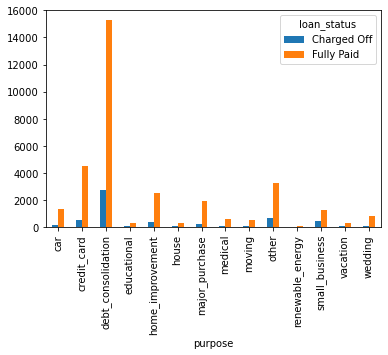

In [139]:
df_cleaned_rows.groupby('purpose')['loan_status'].value_counts().unstack().plot(kind='bar')

In [142]:
# Applicants with Verification status as Source Verified has Highe chances of Loan Defaults

In [141]:
df_loan_closed = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Fully Paid']
df_loan_default = df_cleaned_rows[df_cleaned_rows["loan_status"]== 'Charged Off']

tr0 = go.Box(
    y=df_loan_closed["funded_amnt_inv"],
    x=df_loan_closed["verification_status"],
    name='Loan Closed',
    marker=dict(
        color='#3D9970'
    )
)

tr1 = go.Box(
    y=df_loan_default["funded_amnt_inv"],
    x=df_loan_default["verification_status"],
    name='Loan Default',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [tr0, tr1]

layout = go.Layout(
    yaxis=dict(
        title='Investor Funded Amount',
        zeroline=False
    ),
    xaxis=dict(
        title='Verification Status'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-term-cat')


In [144]:
df_cleaned_rows.debt_to_income.value_counts()

0.00     178
12.00     46
18.00     45
19.20     39
13.20     39
        ... 
28.95      1
25.85      1
25.77      1
27.20      1
25.43      1
Name: debt_to_income, Length: 2853, dtype: int64

#  Univariant Analysis

| Column      | Type of Variable | 
| :---        |    :----:   |  
| term | Ordered Categorical      | 
| int_rate | Ordered Categorical      | 
| grade | Ordered Categorical      | 
| sub_grade | Ordered Categorical      | 
| emp_exp| Ordered Categorical      | 
| derogatory_records | Ordered Categorical      | 
| pub_rec_bankruptcies| Ordered Categorical     | 
| home_ownership | UnOrdered Categorical      | 
| verification_status | UnOrdered Categorical      | 
| loan_status| Ordered Categorical      | 
| purpose| UnOrdered Categorical      | 
| loan_amnt| Quantitative       | 
| funded_amnt| Quantitative       | 
| installment| Quantitative       | 
| dti | Quantitative       | 
| revol_bal  | Quantitative       | 
| revol_util  | Quantitative       | 
| total_acc   | Quantitative       | 
| out_prncp  | Quantitative       | 
| total_pymnt    | Quantitative       | 
| total_prncp_recv | Quantitative       | 
| total_int_recv | Quantitative       | 
| total_late_fee_recv | Quantitative       | 
| recoveries  | Quantitative       | 
| collection_recovery_fee | Quantitative       | 
| last_pymnt_amnt  | Quantitative       | 





### Categorical Variables

<AxesSubplot:>

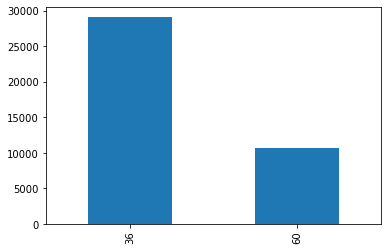

In [523]:
df_cleaned_rows.term.value_counts().plot.bar()

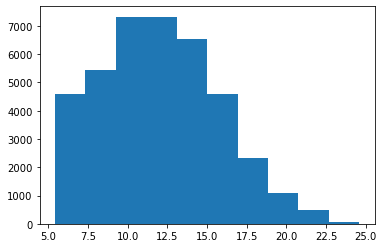

In [524]:
plt.hist(df_cleaned_rows.int_rate,bins=10)
plt.show()

<AxesSubplot:>

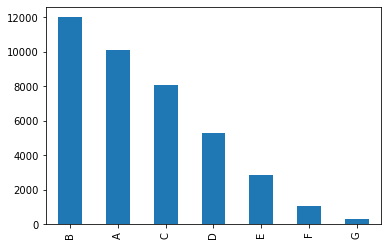

In [525]:
df_cleaned_rows.grade.value_counts().plot.bar()

<AxesSubplot:>

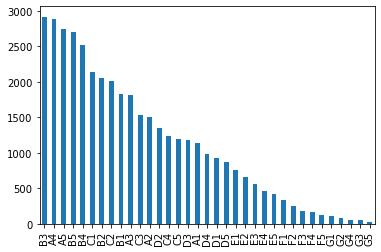

In [526]:
df_cleaned_rows.sub_grade.value_counts().plot.bar()

<AxesSubplot:>

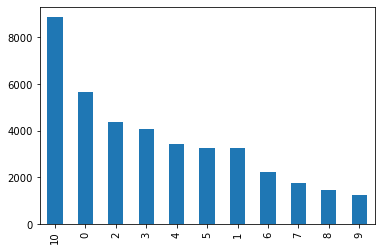

In [527]:
df_cleaned_rows.emp_exp.sort_values().value_counts().plot.bar()

<AxesSubplot:>

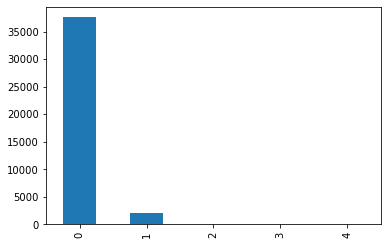

In [528]:
df_cleaned_rows.derogatory_records.value_counts().plot.bar()

<AxesSubplot:>

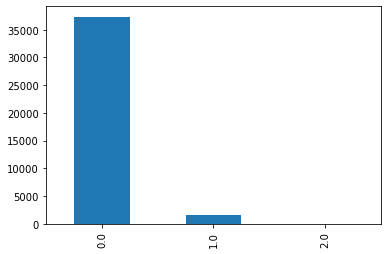

In [529]:
df_cleaned_rows.pub_rec_bankruptcies.value_counts().plot.bar()

<AxesSubplot:>

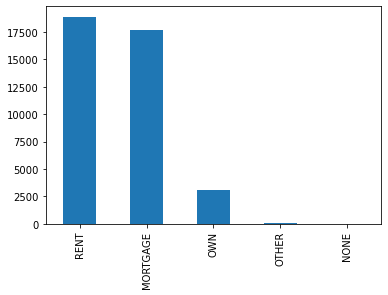

In [530]:
df_cleaned_rows.home_ownership.value_counts().plot.bar()

<AxesSubplot:>

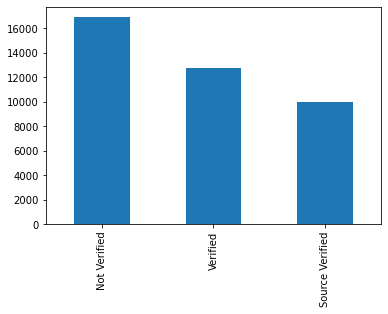

In [531]:
df_cleaned_rows.verification_status.value_counts().plot.bar()


<AxesSubplot:>

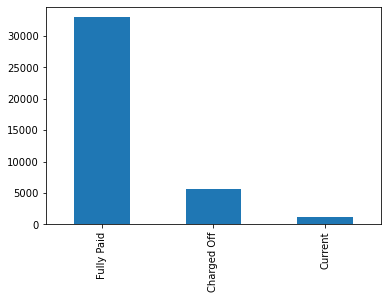

In [532]:
df_cleaned_rows.loan_status.value_counts().plot.bar()

<AxesSubplot:>

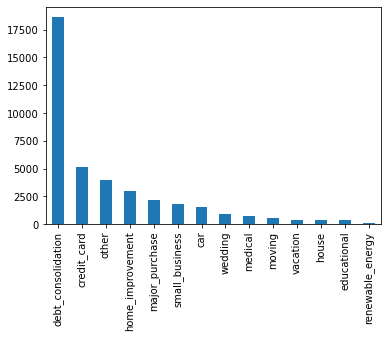

In [533]:
df_cleaned_rows.purpose.value_counts().plot.bar()

### Quantative Variables

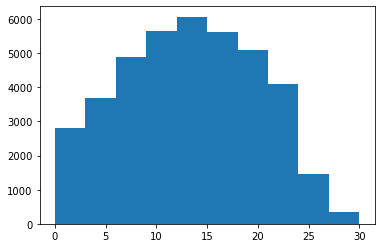

In [534]:
plt.hist(df_cleaned_rows.dti)
plt.show()

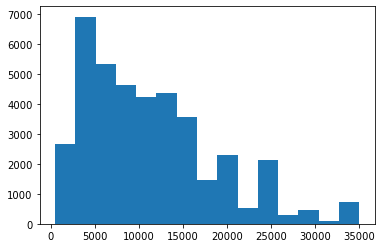

In [535]:
plt.hist(df_cleaned_rows.loan_amnt,bins=15)
plt.show()

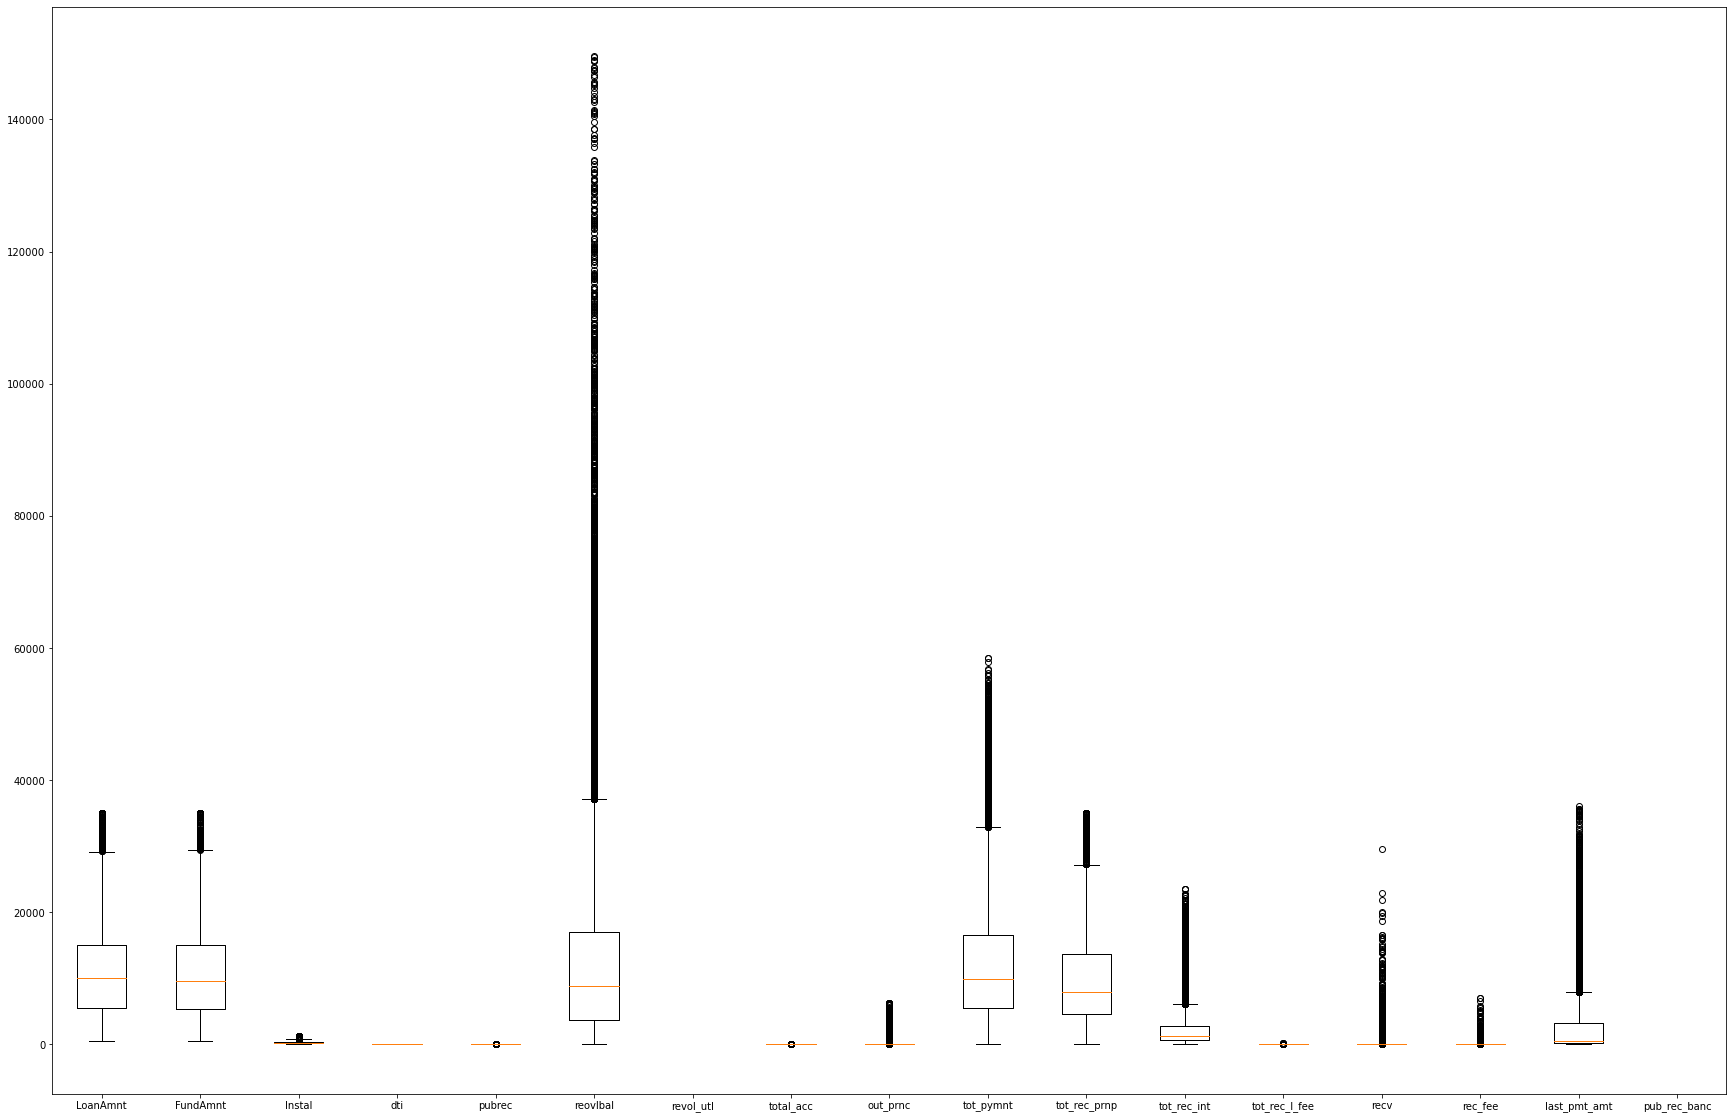

In [536]:
plt.figure(figsize = [30,20])
plt.boxplot([df_cleaned_rows['loan_amnt'],df_cleaned_rows['funded_amnt'],df_cleaned_rows['installment'],
             df_cleaned_rows['dti'],df_cleaned_rows['derogatory_records'],df_cleaned_rows['revol_bal'], df_cleaned_rows['revol_util'],
             df_cleaned_rows['total_acc'],df_cleaned_rows['out_prncp'],df_cleaned_rows['total_pymnt'],
             df_cleaned_rows['total_prncp_recv'],df_cleaned_rows['total_int_recv'],df_cleaned_rows['total_late_fee_recv'],
             df_cleaned_rows['recoveries'],df_cleaned_rows['collection_recovery_fee'],df_cleaned_rows['last_pymnt_amnt'],df_cleaned_rows['pub_rec_bankruptcies'],
            ])
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),
           ["LoanAmnt", "FundAmnt", "Instal", "dti", "pubrec",
           "reovlbal", "revol_utl", "total_acc","out_prnc", "tot_pymnt",
            "tot_rec_prnp", "tot_rec_int","tot_rec_l_fee", "recv", "rec_fee",
            "last_pmt_amt","pub_rec_banc"
                         ])
plt.show()


## Segmented Univariants

In [537]:
# find out applicants applied for 3 years term
df_loan_applicants_3years = df_cleaned_rows[df_cleaned_rows['term']==36]
df_loan_applicants_3years.shape

(29096, 48)

In [538]:
# find out applicants applied for 5 years term
df_loan_applicants_5years = df_cleaned_rows[df_cleaned_rows['term']==60]
df_loan_applicants_5years.shape

(10621, 48)

In [539]:
# find out percentage of loan applicants applied for 3 years term
loan_app_3years_percent = (df_loan_applicants_3years.shape[0]/df_cleaned_rows.shape[0])*100
round(loan_app_3years_percent,2)

73.26

In [540]:
# find out percentage of loan applicants applied for 5 years term
loan_app_5years_percent = (df_loan_applicants_5years.shape[0]/df_cleaned_rows.shape[0])*100
round(loan_app_5years_percent,2)

26.74

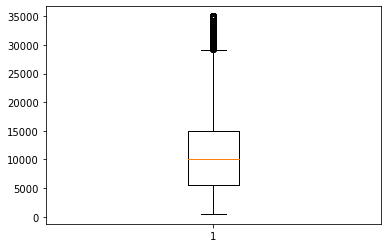

In [541]:
# find out the Loan amount percentiles information
plt.boxplot(df_cleaned_rows.loan_amnt)
plt.show()

## Bivariant Analysis

In [542]:
# find out percentage of loan applicants applied for 3 years term with interest rate between (5-10)%
app_3years_5_10_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=5.00) & (df_loan_applicants_3years.int_rate<10.00)].shape[0]
int_5_10_3years_perc = (app_3years_5_10_count/df_loan_applicants_3years.shape[0])*100
print(f"(5-10)% value is {round(int_5_10_3years_perc,2)}")
# find out percentage of loan applicants applied for 3 years term with interest rate between (10-15)%
app_3years_10_15_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=10.00) & (df_loan_applicants_3years.int_rate<15.00)].shape[0]
int_10_15_3years_perc = (app_3years_10_15_count/df_loan_applicants_3years.shape[0])*100
print(f"(10-15)% value is {round(int_10_15_3years_perc,2)}")
# find out percentage of loan applicants applied for 3 years term with interest rate between (15-20)%
app_3years_15_20_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=15.00) & (df_loan_applicants_3years.int_rate<20.00)].shape[0]
int_15_20_3years_perc = (app_3years_15_20_count/df_loan_applicants_3years.shape[0])*100
print(f"(15-20)% value is {round(int_15_20_3years_perc,2)}")
# find out percentage of loan applicants applied for 3 years term with interest rate between (20-25)%
app_3years_20_25_count = df_loan_applicants_3years[(df_loan_applicants_3years.int_rate>=20.00) & (df_loan_applicants_3years.int_rate<25.00)].shape[0]
int_20_25_3years_perc = (app_3years_20_25_count/df_loan_applicants_3years.shape[0])*100
print(f"(20-25)% value is {round(int_20_25_3years_perc,2)}")

(5-10)% value is 38.97
(10-15)% value is 49.46
(15-20)% value is 11.32
(20-25)% value is 0.25


In [543]:
# find out percentage of loan applicants applied for 5 years term with interest rate between (5-10)%
app_5years_5_10_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=5.00) & (df_loan_applicants_5years.int_rate<10.00)].shape[0]
int_5_10_5years_perc = (app_5years_5_10_count/df_loan_applicants_5years.shape[0])*100
print(f"(5-10)% value is {round(int_5_10_5years_perc,2)}")
# find out percentage of loan applicants applied for 5 years term with interest rate between (10-15)%
app_5years_10_15_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=10.00) & (df_loan_applicants_5years.int_rate<15.00)].shape[0]
int_10_15_5years_perc = (app_5years_10_15_count/df_loan_applicants_5years.shape[0])*100
print(f"(10-15)% value is {round(int_10_15_5years_perc,2)}")
# find out percentage of loan applicants applied for 5 years term with interest rate between (15-20)%
app_5years_15_20_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=15.00) & (df_loan_applicants_5years.int_rate<20.00)].shape[0]
int_15_20_5years_perc = (app_5years_15_20_count/df_loan_applicants_5years.shape[0])*100
print(f"(15-20)% value is {round(int_15_20_5years_perc,2)}")
# find out percentage of loan applicants applied for 5 years term with interest rate between (20-25)%
app_5years_20_25_count = df_loan_applicants_5years[(df_loan_applicants_5years.int_rate>=20.00) & (df_loan_applicants_5years.int_rate<25.00)].shape[0]
int_20_25_5years_perc = (app_5years_20_25_count/df_loan_applicants_5years.shape[0])*100
print(f"(20-25)% value is {round(int_20_25_5years_perc,2)}")


(5-10)% value is 7.57
(10-15)% value is 43.83
(15-20)% value is 41.08
(20-25)% value is 7.52


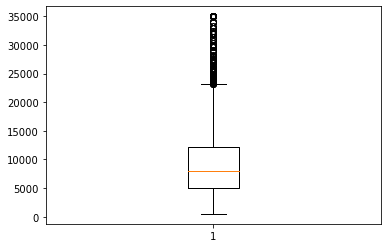

In [544]:
# Loan amount percentiles can be analyzed here.
plt.boxplot(df_loan_applicants_3years.loan_amnt)
plt.show()

## Correlation Matrix

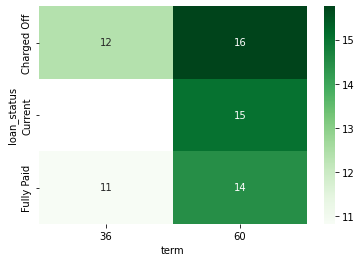

In [545]:
# Finding correlation between Loan Status, Term with Interest rate
df_filtered_cols = df_cleaned_rows[['loan_status','term','int_rate']]
res = pd.pivot_table(data=df_filtered_cols,index="loan_status",columns="term",values="int_rate")
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()


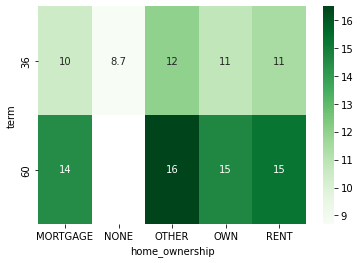

In [546]:
# Finding correlation between Home ownership, Term with Interest rate
df_filtered_cols = df_cleaned_rows[['home_ownership','term','int_rate']]
res = pd.pivot_table(data=df_filtered_cols,index="term",columns="home_ownership",values="int_rate")
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

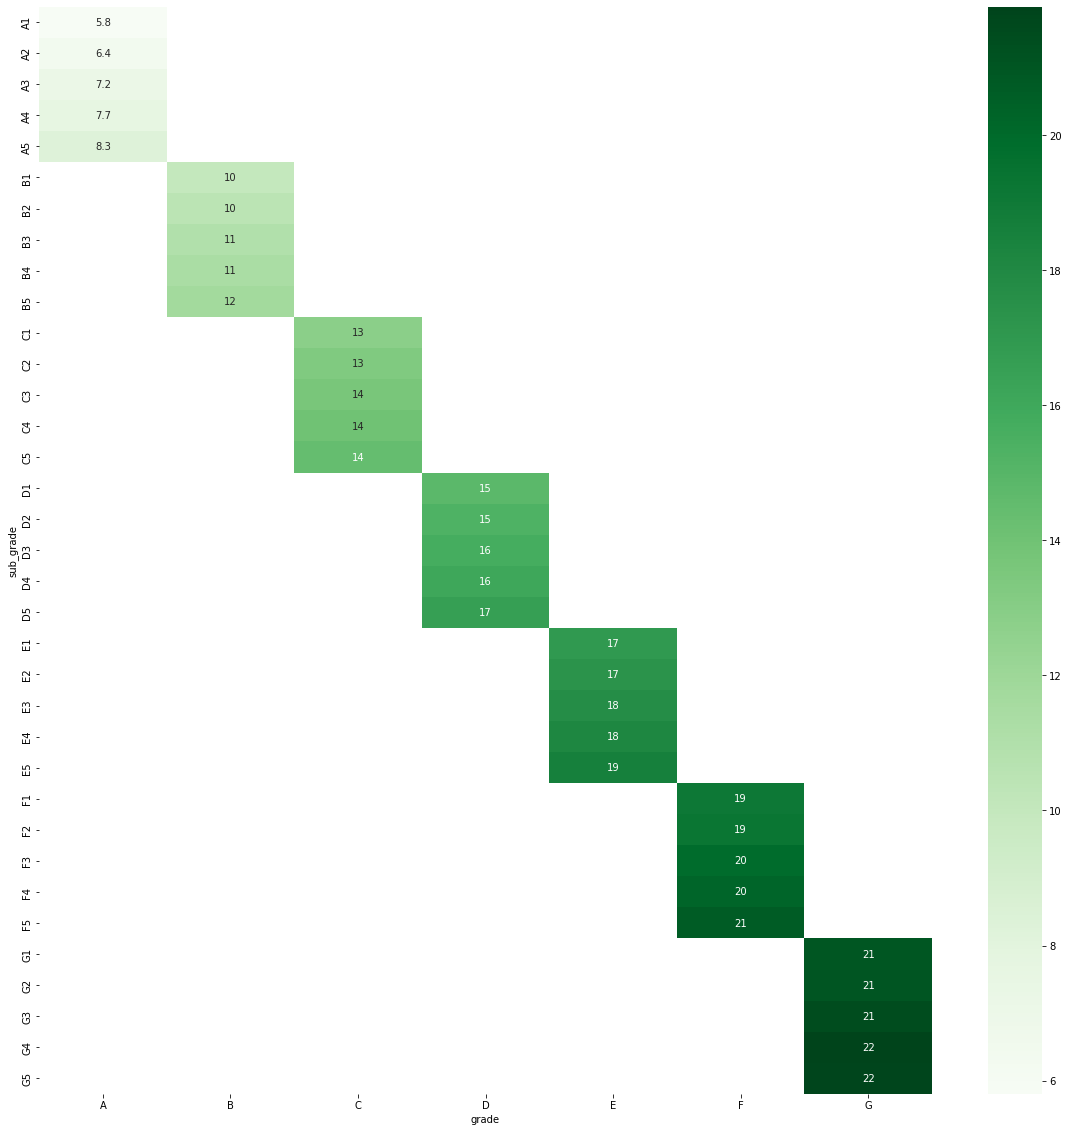

In [152]:
# Find out which Grade loan applicants has Highest Interest rate and lowest interest rates.
# Finding correlation between Grade, Subgrade with Interest rate
plt.figure(figsize=[20,20])
df_filtered_cols = df_cleaned_rows[['grade','sub_grade','int_rate']]
res = pd.pivot_table(data=df_filtered_cols,index="sub_grade",columns="grade",values="int_rate")
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

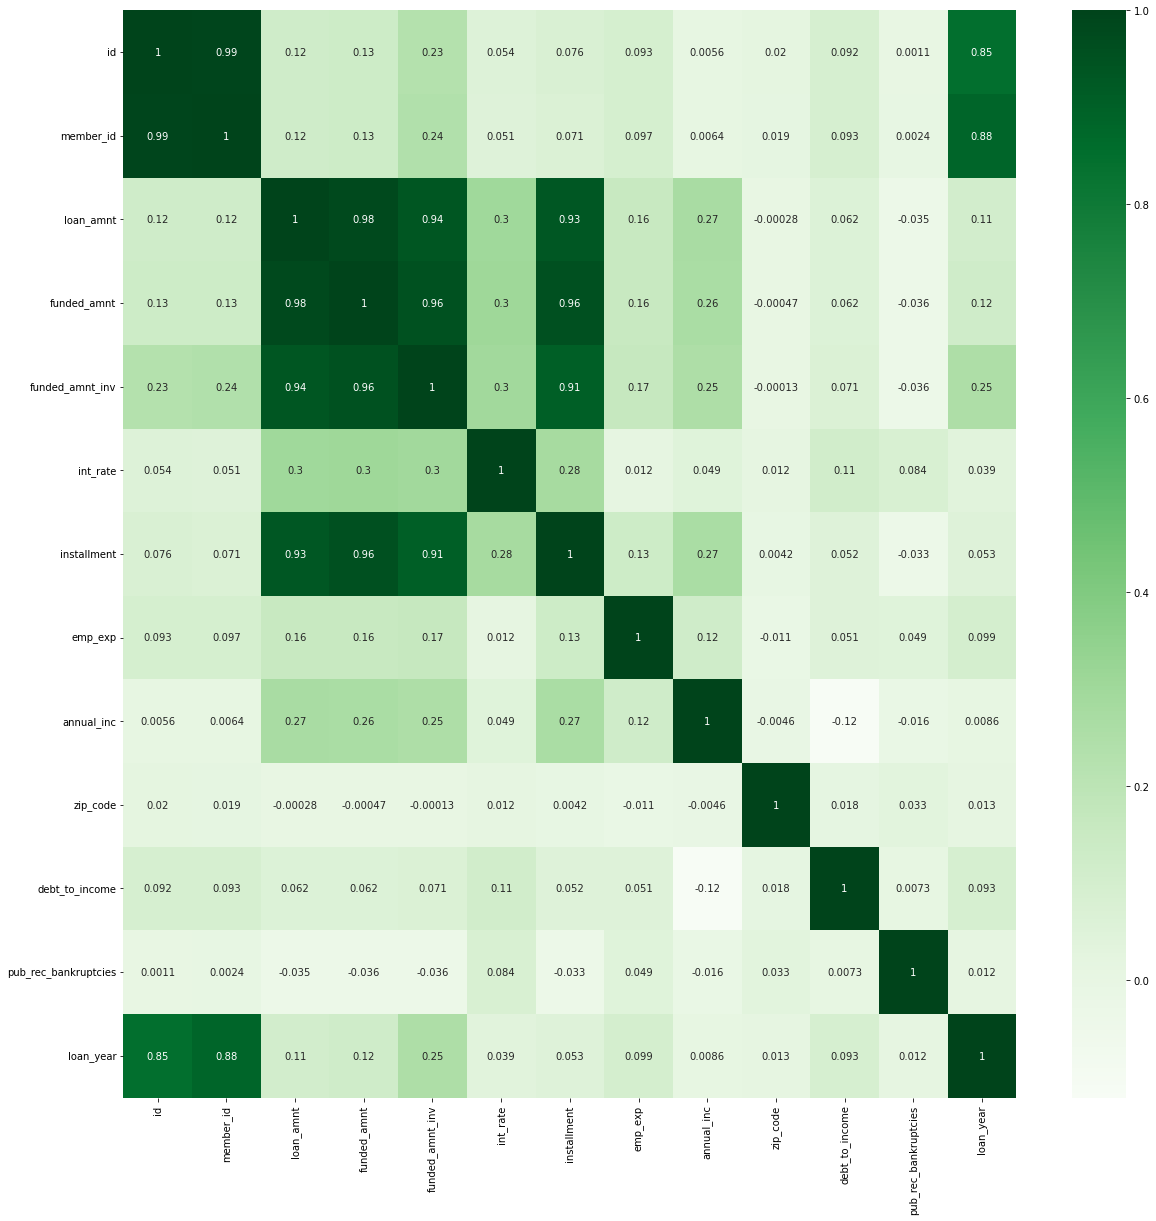

In [153]:
plt.figure(figsize=[20,20])
df_analysis = df_cleaned_rows
# df_analysis.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','tax_liens'], axis=1,inplace = True)
sns.heatmap(df_analysis.corr(),cmap = "Greens", annot=True)
plt.show()

# Derived Metrics

###### Derive new column Credit Limit

In [549]:
# Credit limit = revol_bal/(revol_util/100) 
calc = (df_cleaned_rows['revol_util']/100)
df_cleaned_rows['credit_limit'] = df_cleaned_rows['revol_bal'] / calc
df_cleaned_rows['credit_limit'] = df_cleaned_rows['credit_limit'].round(2)


In [550]:
# df_amounts_filter = df_cleaned_rows[['term','funded_amnt','installment','loan_status','out_prncp','total_pymnt','total_prncp_recv','total_int_recv',
#                                      'recoveries','collection_recovery_fee','total_late_fee_recv'
#                                     ]]
# df_amounts_filter.head()

term  funded_amnt  installment  loan_status  out_prncp  total_pymnt  \
0    36         5000       162.87   Fully Paid       0.00      5863.16   
1    60         2500        59.83  Charged Off       0.00      1008.71   
2    36         2400        84.33   Fully Paid       0.00      3005.67   
3    36        10000       339.31   Fully Paid       0.00     12231.89   
4    60         3000        67.79      Current     524.06      3513.33   

   total_prncp_recv  total_int_recv  recoveries  collection_recovery_fee  \
0           5000.00          863.16        0.00                     0.00   
1            456.46          435.17      117.08                     1.11   
2           2400.00          605.67        0.00                     0.00   
3          10000.00         2214.92        0.00                     0.00   
4           2475.94         1037.39        0.00                     0.00   

   total_late_fee_recv  
0                 0.00  
1                 0.00  
2                 0.00  
3                16.97  
4                 0.00

In [551]:
# df_amounts_filter = df_amounts_filter[df_amounts_filter.loan_status!='Current']
# df_amounts_filter['profit_loss'] = df_amounts_filter.total_pymnt - df_amounts_filter.collection_recovery_fee - df_amounts_filter.funded_amnt
# df_amounts_filter['p_l_flag'] = df_amounts_filter['profit_loss'].map(lambda x: 'P' if x>0  else 'L' )
# df_amounts_filter.head()

term  funded_amnt  installment  loan_status  out_prncp  total_pymnt  \
0    36         5000       162.87   Fully Paid        0.0      5863.16   
1    60         2500        59.83  Charged Off        0.0      1008.71   
2    36         2400        84.33   Fully Paid        0.0      3005.67   
3    36        10000       339.31   Fully Paid        0.0     12231.89   
5    36         5000       156.46   Fully Paid        0.0      5632.21   

   total_prncp_recv  total_int_recv  recoveries  collection_recovery_fee  \
0           5000.00          863.16        0.00                     0.00   
1            456.46          435.17      117.08                     1.11   
2           2400.00          605.67        0.00                     0.00   
3          10000.00         2214.92        0.00                     0.00   
5           5000.00          632.21        0.00                     0.00   

   total_late_fee_recv  profit_loss p_l_flag  
0                 0.00       863.16        P  
1                 0.00     -1492.40        L  
2                 0.00       605.67        P  
3                16.97      2231.89        P  
5                 0.00       632.21        P

<AxesSubplot:xlabel='p_l_flag', ylabel='profit_loss'>

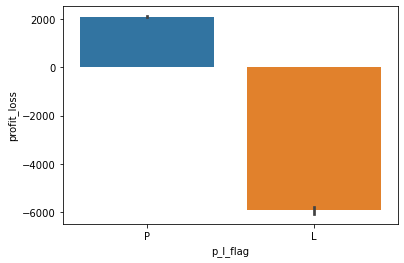

In [552]:
sns.barplot(x = 'p_l_flag', y = 'profit_loss', data = df_amounts_filter)

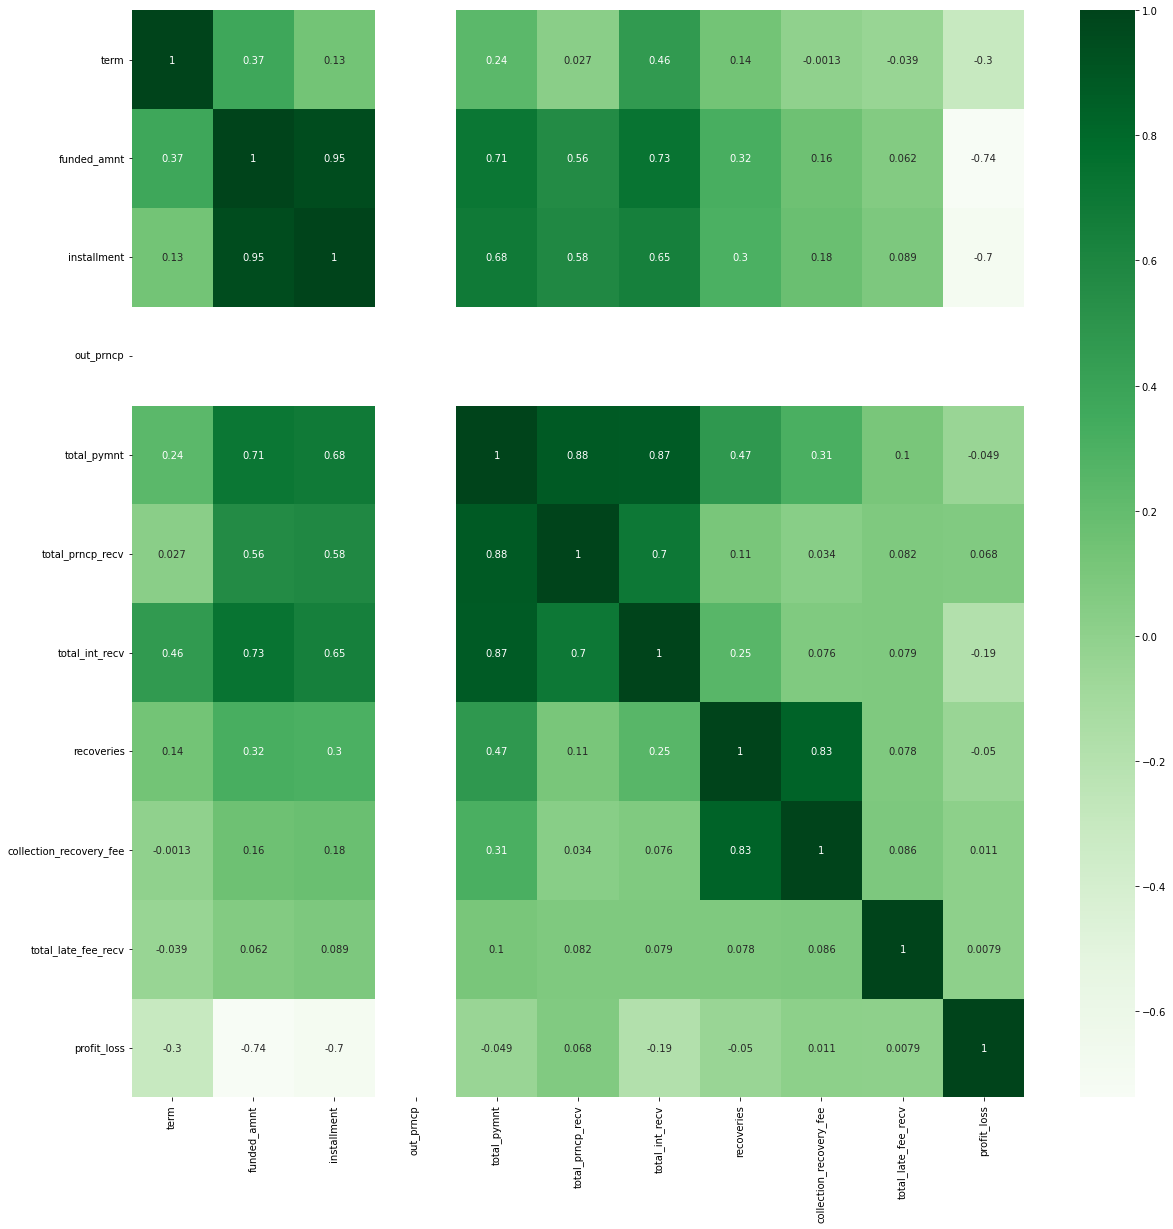

In [556]:
df_loss = df_amounts_filter[df_amounts_filter.p_l_flag=='L']
df_loss.corr()
plt.figure(figsize=[20,20])
sns.heatmap(df_loss.corr(),cmap = "Greens", annot=True)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

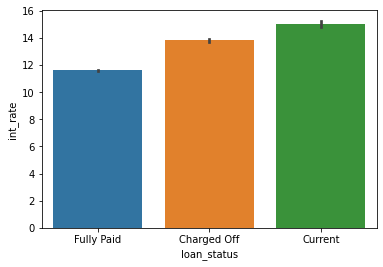

In [582]:
sns.barplot(x = 'loan_status', y = 'int_rate', data = df_cleaned_rows)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

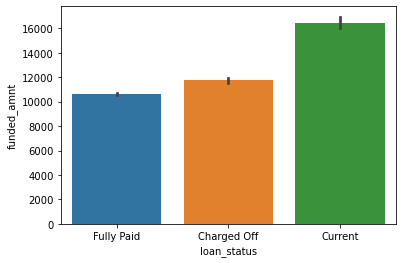

In [583]:
sns.barplot(x = 'loan_status', y = 'funded_amnt', data = df_cleaned_rows)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

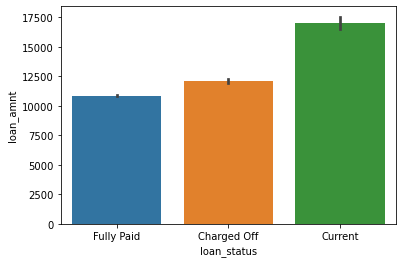

In [584]:
sns.barplot(x = 'loan_status', y = 'loan_amnt', data = df_cleaned_rows)

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

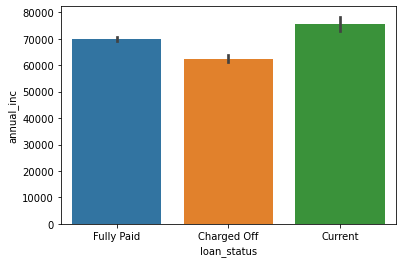

In [585]:
sns.barplot(x = 'loan_status', y = 'annual_inc', data = df_cleaned_rows)